In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [76]:
data = pd.read_csv('data/final_data.csv')
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
# plt.rcParams['xlabel.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 17

In [77]:
data

,Unnamed: 0,0.625 MHz,1.25 MHz,1.875 MHz,2.5 MHz,3.125 MHz,3.75 MHz,4.375 MHz,5 MHz,5.625 MHz,6.25 MHz
0,0,6912,-9984,-5888,11264,-10496,-4096,-15360,7680,1536,12800
1,1,14080,-15360,-12544,-2304,10496,-5888,7936,15360,10240,12800
2,2,16128,512,13568,-7680,-10496,13312,10496,2048,15104,12800
3,3,11776,15616,4096,14592,10496,-15872,-14592,-14080,14080,12800
4,4,3072,8960,-16128,-15872,-10496,12288,-1536,-10752,7680,12800
...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,-12800,-15872,14592,14848,-11008,2048,15872,10240,15360,14848
15996,15996,-16128,-2304,-11008,-8448,11008,7680,-3584,-8192,11008,14848
15997,15997,-13312,14592,-7936,-1280,-11008,-14336,-13568,-15360,2304,14848
15998,15998,-5376,11264,15872,10496,11008,15616,12032,-1280,-7168,14848


In [78]:
divisor = 10
vs = 62.5 / divisor #Mhz
vos = data.columns[1:]
vpp = 1 # V
total_time = 1 / vs

# Part 5.2

In [79]:
def calc_power_fft(arr):
    fft = np.fft.fft(arr/2**15)
    shift_fft = np.fft.fftshift(fft)
    power_fft = np.abs(shift_fft) ** 2
    return power_fft

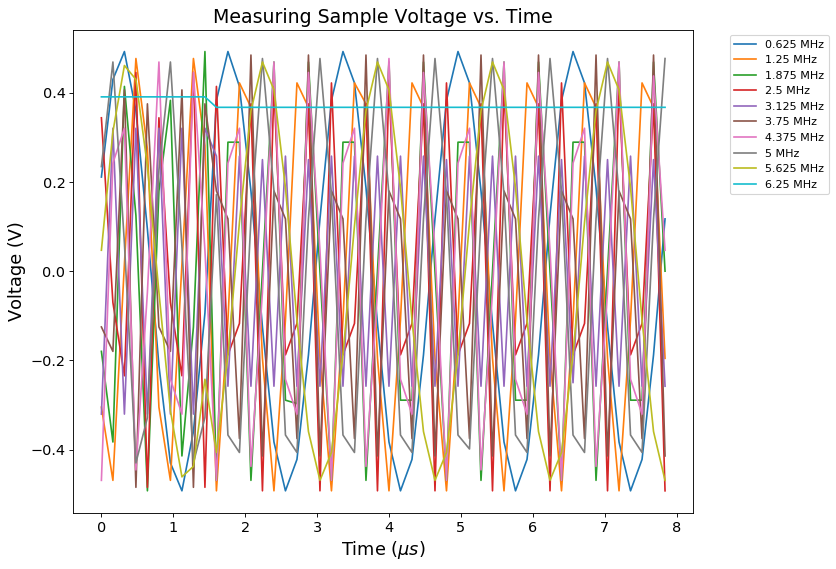

In [80]:
time = np.arange(0, 16000) * total_time
plt.figure(figsize=(10,8), dpi=80)
for vo in vos:
    v = data[vo][:50] / 2**15
    plt.plot(time[:50], v, label=vo)
# plt.xlim(0,25e-6)
plt.xlabel('Time $(\mu s)$')
plt.ylabel('Voltage (V)')
plt.title('Measuring Sample Voltage vs. Time')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

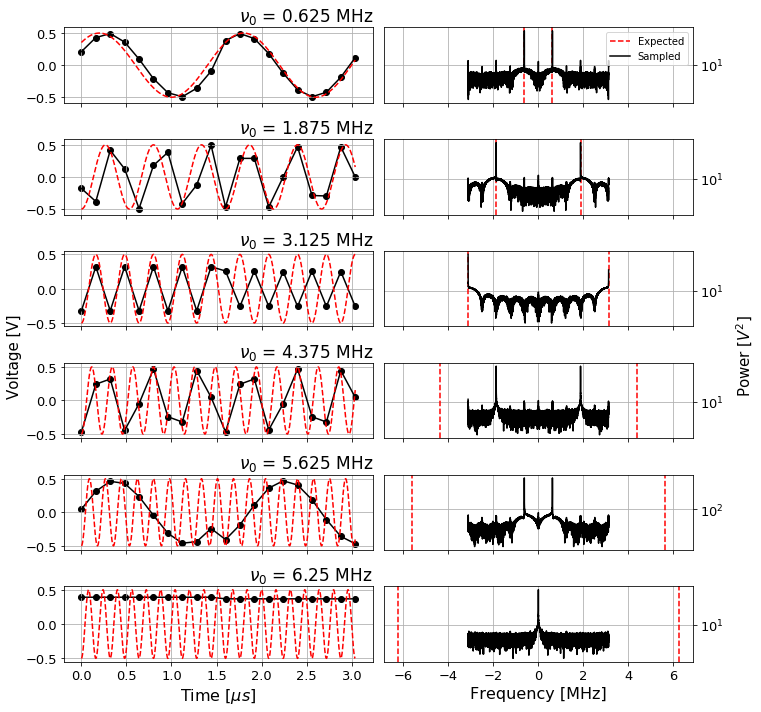

In [85]:
fig, ax = plt.subplots(6, 2, figsize=(10,10), sharex='col')
for i in range(0, len(vos), 2):
    vo = vos[i]
    # plot sinusoidal wave
    v = data[vo][:20] / 2**15
    ax[i//2,0].plot(time[:20], v, color="black")
    signal = float(vo.split(" ")[0])
    x = np.linspace(0, time[:20][-1], 1000)
    if i == 0:
        label1 = "Expected"
        label2 = "Sampled"
        phase = np.pi*3.5/2
    else:
        label1 = ''
        label2 = ''
        phase = np.pi
    ax[i//2,0].plot(x,0.5*np.cos(x*2*np.pi*signal + phase), 'r--',label=vo)
    ax[i//2,0].scatter(time[:20], v, color='black')
    ax[i//2,0].set_title('$\\nu_0$ = ' + vo, loc='right')
    
    # plot FFT power spectra
    power_fft = calc_power_fft(data[vo])
    ax[i//2,1].axvline(x=signal, color='red', ls='--', label=label1)
    ax[i//2,1].axvline(x=-signal, color='red', ls='--')
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    ax[i//2,1].plot(freq, power_fft, color="black", label=label2)
    ax[i//2,1].set_yscale('log')
    ax[i//2,1].yaxis.tick_right()
    ax[i//2,1].grid()
    ax[i//2,0].grid()
    if label1 != '':
        ax[i//2,1].legend()

vo = vos[-1]
v = data[vo][:20] / 2**15
ax[5,0].plot(time[:20], v, color="black")
signal = float(vo.split(" ")[0])
x = np.linspace(0, time[:20][-1], 1000)
if i == 0:
    label1 = "Expected"
    label2 = "Sampled"
    phase = np.pi*3.5/2
else:
    label1 = ''
    label2 = ''
    phase = np.pi
ax[5,0].plot(x,0.5*np.cos(x*2*np.pi*signal + phase), 'r--',label=vo)
ax[5,0].scatter(time[:20], v, color='black')
ax[5,0].set_title('$\\nu_0$ = ' + vo, loc='right')

# plot FFT power spectra
power_fft = calc_power_fft(data[vo])
ax[5,1].axvline(x=signal, color='red', ls='--', label=label1)
ax[5,1].axvline(x=-signal, color='red', ls='--')
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
ax[5,1].plot(freq, power_fft, color="black", label=label2)
ax[5,1].set_yscale('log')
ax[5,1].yaxis.tick_right()
ax[5,0].set_xlabel('Time [$\mu s$]')
ax[5,1].set_xlabel('Frequency [MHz]')
ax[5,0].grid()
ax[5,1].grid()
fig.text(-0.01, 0.5, 'Voltage [V]', va='center', rotation='vertical', fontsize=15)
fig.text(1.0, 0.5, 'Power [$V^2$]', va='center', rotation='vertical', fontsize=15)

plt.tight_layout()
plt.show()
fig.savefig('samples.png')

# Part 5.3

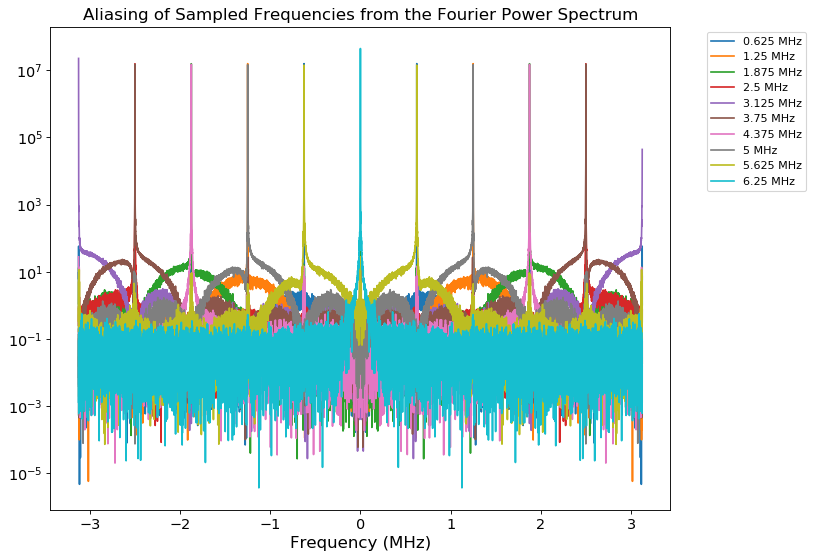

In [82]:
ffts = []
plt.figure(figsize=(10,8), dpi=80)
for vo in vos:
    power_fft = calc_power_fft(data[vo])
    fft = np.fft.fft(data[vo])
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    ffts.append(fft)
    plt.plot(freq, power_fft, label=vo)

plt.xlabel('Frequency (MHz)', fontsize=15)
# plt.ylabel('Amplitude', fontsize=15)
plt.yscale('log')
plt.title('Aliasing of Sampled Frequencies from the Fourier Power Spectrum', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
plt.show()

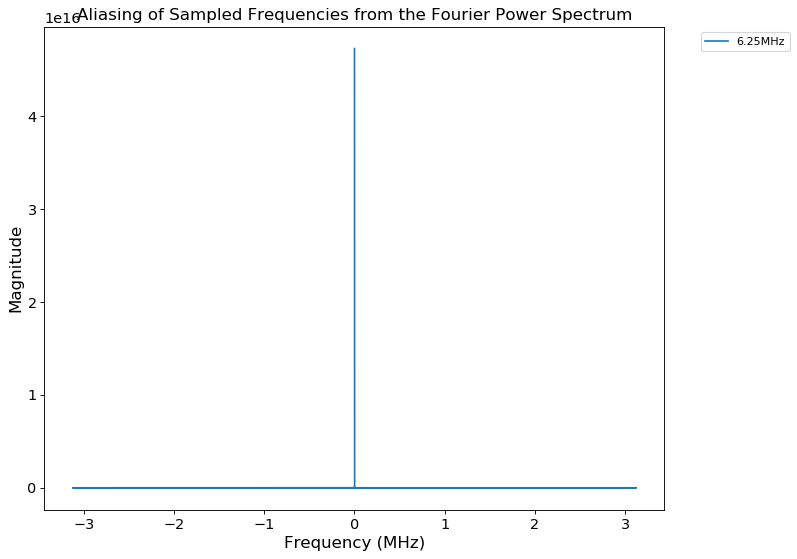

In [83]:
# ffts = []
plt.figure(figsize=(10,8), dpi=80)
# fig, ax = plt.subplots()
# for vo in vos:
fft = np.fft.fft(data['6.25 MHz'])
plot_fft = np.fft.fftshift(fft)
freq = np.fft.fftfreq(16000, d=1/vs)
# ffts.append(fft)
power_fft = np.abs(fft)**2
plt.plot(freq, power_fft, label='6.25MHz')
#     print(plot_fft)
# plt.xlim(0,0.0001)
# plt.yscale('log')
plt.xlabel('Frequency (MHz)', fontsize=15)
plt.ylabel('Magnitude', fontsize=15)
plt.title('Aliasing of Sampled Frequencies from the Fourier Power Spectrum', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
plt.show()

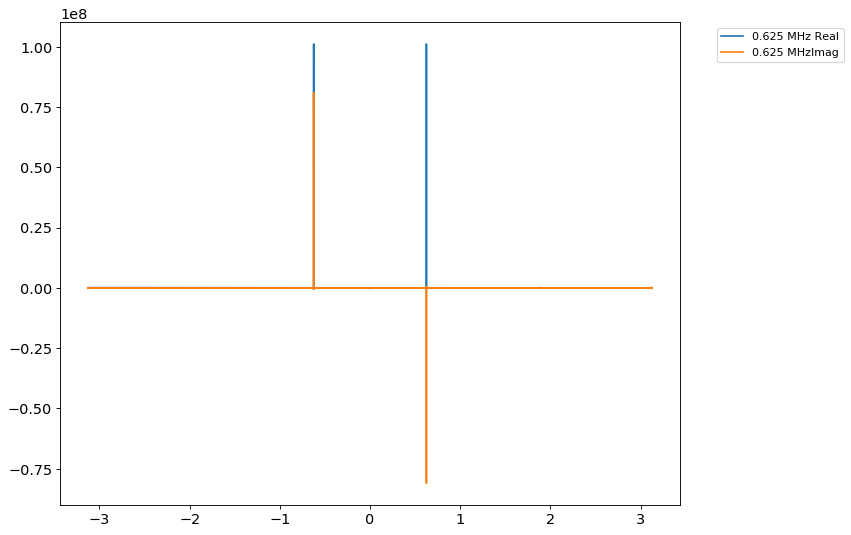

In [84]:
# for fft in ffts:
plt.figure(figsize=(10,8), dpi=80)
plt.plot(freq, ffts[0].real, label=vos[0] + ' Real')
plt.plot(freq, ffts[0].imag, label=vos[0] + 'Imag')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

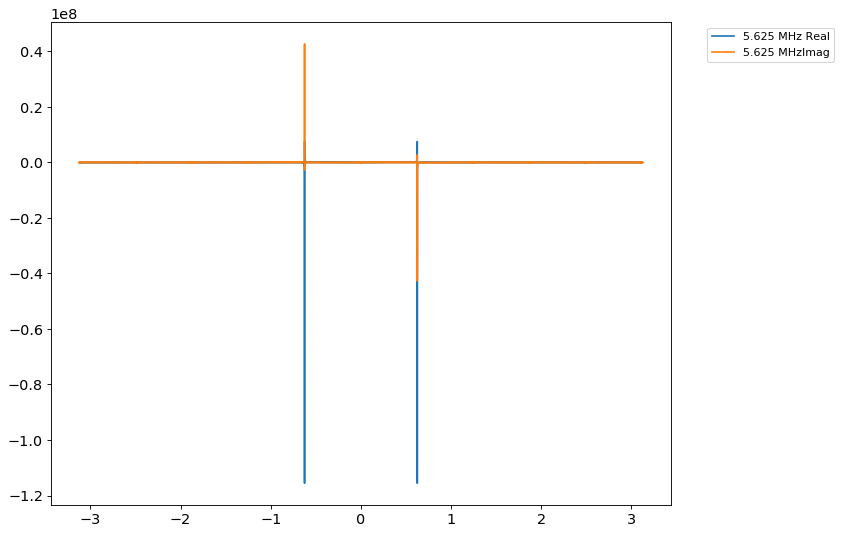

In [11]:
# for fft in ffts:
plt.figure(figsize=(10,8), dpi=80)
plt.plot(freq, ffts[-2].real, label=vos[-2] + ' Real')
plt.plot(freq, ffts[-2].imag, label=vos[-2] + 'Imag')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [12]:
nu_s_realizations_1 = np.load('data/0.1_nu_s_realizations.npy')
nu_s_realizations_8 = np.load('data/0.8_nu_s_realizations.npy')
print(nu_s_realizations_1.shape)

(5, 16000)


In [13]:
blocks_2 = np.load('data/blocks_2.npy')
blocks_4 = np.load('data/blocks_4.npy')
blocks_16 = np.load('data/blocks_16.npy')
blocks_8 = np.load('data/blocks_8.npy')
print(blocks_8.shape)

(1, 8, 16000)


Text(0.43, 0.0, 'Frequency [MHz]')

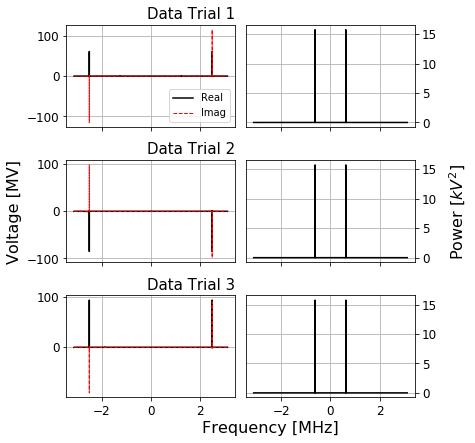

In [14]:
fig, ax = plt.subplots(3, 2,figsize=(6,6), sharex='col')

for i in range(3):
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
#     ax[i,0].set_yscale('log')
#     ax[i,1].set_yscale('log')
    fft = np.fft.fft(nu_s_realizations_1[i][:])
    ax[i,0].plot(freq, fft.real/1e6, 'black',label='Real', lw=1.5)
    ax[i,0].plot(freq, fft.imag/1e6, 'r--', label='Imag', lw=1.)
#     ax[0].legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
    ax[i,0].set_title('Data Trial ' + str(i+1), fontsize=15, loc='right')
    power_fft = calc_power_fft(nu_s_realizations_1[i][:])
    ax[i,1].plot(freq, power_fft/1e6, color='black')
    ax[i,1].yaxis.tick_right()
    ax[i,1].grid()
    ax[i,0].grid()
    ax[i,1].tick_params(axis='both', labelsize= 12)
    ax[i,0].tick_params(axis='both', labelsize= 12)
    
#     ax[1].set_yscale('log')
#     ax[1].set_xlabel("Frequency [MHz]", fontsize=15)
#     ax[1].legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
# ax[0,0].set_title("Voltage Spectra", fontsize=15)
# ax[0,1].set_title("Power Spectra", fontsize=15)
plt.tight_layout()
ax[0,0].legend(loc='lower right')
fig.text(-0.02, 0.5, 'Voltage [MV]', va='center', rotation='vertical', fontsize=16)
fig.text(1, 0.5, 'Power [$kV^2$]', va='center', rotation='vertical', fontsize=16)
fig.text(0.43, 0.0, 'Frequency [MHz]', va='center', fontsize=16)

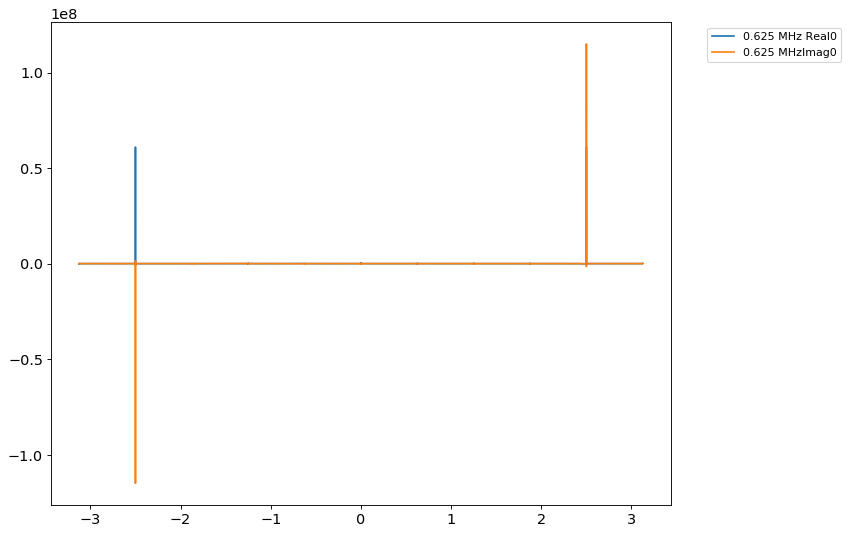

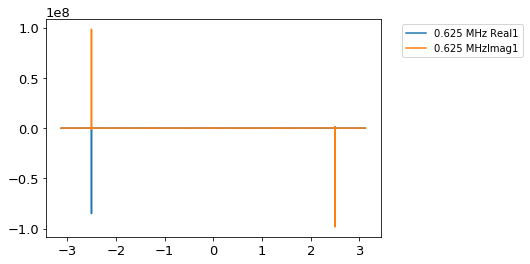

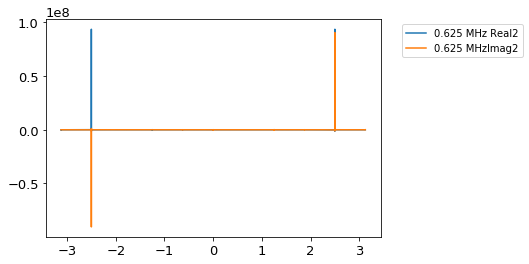

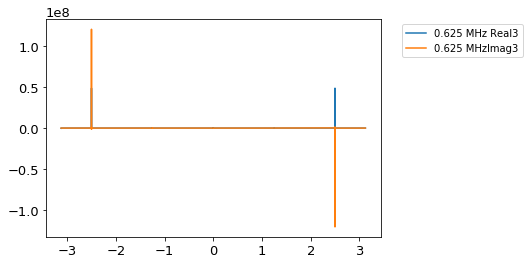

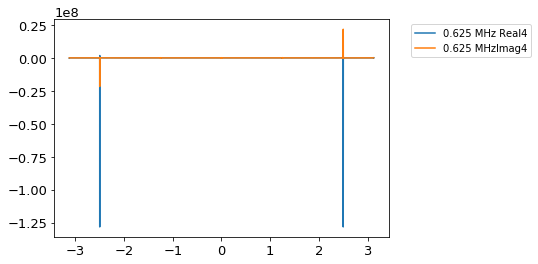

In [15]:
plt.figure(figsize=(10,8), dpi=80)
for i in range(nu_s_realizations_1.shape[0]):
    # for fft in ffts:
    # for i in range(0,len(vos)//2,2):
    fft = np.fft.fft(nu_s_realizations_1[i][:])
    plt.plot(freq, fft.real, label='0.625 MHz' + ' Real' + str(i))
    plt.plot(freq, fft.imag, label='0.625 MHz' + 'Imag' + str(i))
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

# Part 5.4

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


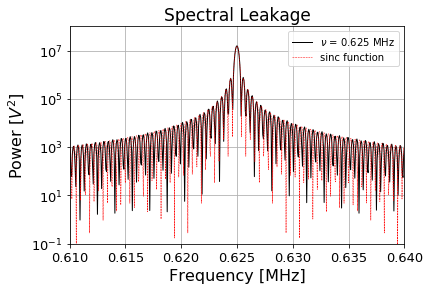

In [16]:
# spectral leakage plot sinc function over power spectra of spectral leakage
ref = data['0.625 MHz']
fourier=np.load('data/Fourier_100k_samples.npy')[0]
power=np.load('data/Power_100k_samples.npy')
ref_power_fft = calc_power_fft(ref)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
plt.plot(fourier/1e6, power, color='black', lw=1, label="$\\nu$ = 0.625 MHz")
x=np.linspace(0.61,0.64,1000)
plt.plot(x,1.5e7*np.sinc((x-0.625)*2500)**2,'r--',label='sinc function', lw=0.5)
# plt.plot(freq, np.sin(6*freq)/(freq) + .75, "r--", label="$sin(x)/x$")
plt.yscale('log')
plt.xlim(0.61, 0.64)
plt.ylim(.1, 100000000)
# plt.xlim(0.62, 0.63)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power [$V^2$]")
plt.title("Spectral Leakage")
plt.legend()
plt.grid()
plt.savefig("leakage.png")

# plt.xlim(-1,2)

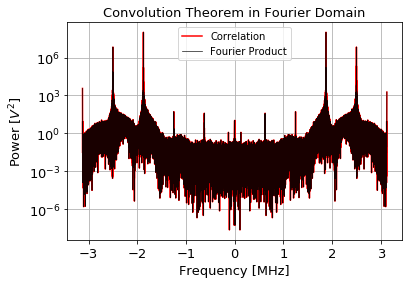

In [17]:
# prove correlation theorem by correlation same as multiplying in FFT and then can plot sinc function over this
data1 = data['0.625 MHz']/2**15
data2 = data['1.25 MHz']/2**15
data1 = np.pad(data1, (len(data1), len(data1)), mode='constant', constant_values=(0,0))
data2 = np.pad(data2, (len(data2), len(data2)), mode='constant', constant_values=(0,0))
correlate = np.correlate(data1, data2, mode='same')
correlate_fft = np.fft.fft(correlate)
inv_correlate = np.fft.ifft(correlate_fft)

# data1 = data['0.625 MHz']/2**15
# data2 = data['1.25 MHz']/2**15
fft1 = np.fft.fft(data1)
fft2 = np.fft.fft(data2)
fft = np.conj(fft1) * fft2
inv_fft = np.fft.ifft(fft)
freq = np.fft.fftshift(np.fft.fftfreq(len(data1), d=1/6.25))
plt.plot(freq, np.abs(correlate_fft)**2, 'r-', label="Correlation")
plt.plot(freq, np.abs(fft)**2, 'k-', lw=0.7, alpha=0.9, label="Fourier Product")
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('Frequency [MHz]', fontsize=13)
plt.ylabel('Power [$V^2$]', fontsize=13)
plt.title('Convolution Theorem in Fourier Domain', fontsize=13)
plt.savefig('convolution.png')
# plt.plot(inv_correlate[:200], 'r--')
# plt.plot(inv_fft[:200])

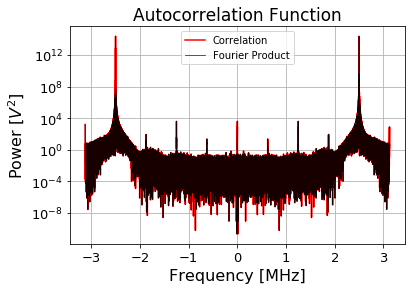

In [18]:
# prove correlation theorem by correlation same as multiplying in FFT and then can plot sinc function over this
data1 = data['0.625 MHz']/2**15
data2 = data['1.25 MHz']/2**15
data1 = np.pad(data1, (len(data1), len(data1)), mode='constant', constant_values=(0,0))
data2 = np.pad(data2, (len(data2), len(data2)), mode='constant', constant_values=(0,0))
correlate = np.correlate(data1, data1, mode='same')
correlate_fft = np.fft.fft(correlate)
inv_correlate = np.fft.ifft(correlate_fft)

# data1 = data['0.625 MHz']/2**15
# data2 = data['1.25 MHz']/2**15
fft1 = np.fft.fft(data1)
fft2 = np.fft.fft(data2)
fft = np.conj(fft1) * fft1
inv_fft = np.fft.ifft(fft)
freq = np.fft.fftshift(np.fft.fftfreq(len(data1), d=1/6.25))
plt.plot(freq, np.abs(correlate_fft)**2, 'r-', label="Correlation")
plt.plot(freq, np.abs(fft)**2, 'k-', lw=0.7, alpha=0.9, label="Fourier Product")
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [$V^2$]')
plt.title('Autocorrelation Function')
plt.savefig('autocorrelation.png')
# plt.plot(inv_correlate[:200], 'r--')
# plt.plot(inv_fft[:200])

# Part 5.5 Frequency Resolution

In [19]:
window_1 = np.load('data/nyquist_window_1.npy')
window_2 = np.load('data/nyquist_window_2.npy')
window_3 = np.load('data/nyquist_window_3.npy')
window_4 = np.load('data/nyquist_window_4.npy')
window_5 = np.load('data/nyquist_window_5.npy')
window_6 = np.load('data/nyquist_window_6.npy')
window_2_5 = np.load('data/nyquist_window_2_5.npy')
window_3_5 = np.load('data/nyquist_window_3_5.npy')

tenth = np.load('data/tenth.npy')
hundredth = np.load('data/hundredth.npy')
thousandth = np.load('data/thousandth.npy')


(0.98, 1.11)

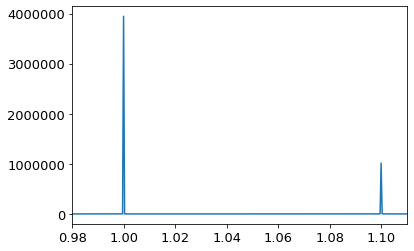

In [20]:
ref = tenth[0][0]
pow_fft = calc_power_fft(ref)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
plt.plot(freq, pow_fft)
plt.xlim(0.98, 1.11)

(0.99, 1.011)

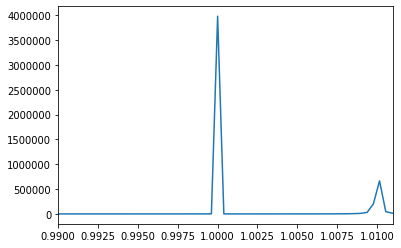

In [24]:
ref = hundredth[0][0]
pow_fft = calc_power_fft(ref)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
plt.plot(freq, pow_fft)
plt.xlim(0.99, 1.011)

(0.999, 1.002)

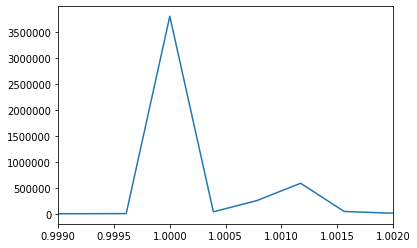

In [22]:
ref = thousandth[0][0]
pow_fft = calc_power_fft(ref)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
plt.plot(freq, pow_fft)
plt.xlim(0.999, 1.002)

In [39]:
import ugradio
# ugradio.dft.dft?
vs = 6.25
N = 2*16000
thousandth_v = thousandth[0][0]/2**15
fs = np.linspace(-vs/2.,vs/2.,num=N,endpoint=False)
print(len(np.linspace(-N/(2.0*vs),N/(2.0*vs),num=N,endpoint=False)))
Fourier_32000=ugradio.dft.dft(thousandth_v,vsamp=vs)

# Fourier_32000=ugradio.dft.dft(thousandth_v,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=N,endpoint=False),f=np.linspace(-vs/2.,vs/2.,num=N,endpoint=False),vsamp=vs)


32000


In [11]:
import ugradio
vsamp = 6.25e6
N = 16000
thousandth_v = thousandth[0][0]/2**15
# fs = np.linspace(-vs/2.,vs/2.,num=N,endpoint=False)
Fourier = ugradio.dft.dft(thousandth_v,t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=16000,endpoint=False),vsamp=6.25e6)

# print(len(np.linspace(-N/(2.0*vs),N/(2.0*vs),num=N,endpoint=False)))
# Fourier_50000=ugradio.dft.dft(thousandth_v,vsamp=vs)
# Fourier1=ugradio.dft.dft(data[0,:][0,:]/2**15,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=50000,endpoint=False),vsamp=6.25e6)
Fourier_32000=ugradio.dft.dft(thousandth_v,t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=32000,endpoint=False),vsamp=6.25e6)
Fourier_64000=ugradio.dft.dft(thousandth_v,t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=64000,endpoint=False),vsamp=6.25e6)


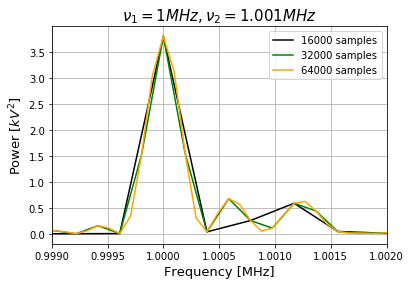

In [22]:
# Fourier = ugradio.dft.dft(thousandth_v,t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=16000,endpoint=False),vsamp=6.25e6)

plt.plot(Fourier[0]/1e6, np.abs(Fourier[1])**2/1e6, 'k-',label='16000 samples')
# plt.plot(Fourier_32000[0], np.abs(Fourier_32000[1])**2, label='32000 samples')
plt.plot(Fourier_32000[0]/1e6, np.abs(Fourier_32000[1])**2/1e6, 'g-',label='32000 samples')
plt.plot(Fourier_64000[0]/1e6, np.abs(Fourier_64000[1])**2/1e6, 'orange',label='64000 samples')
plt.grid()
plt.xlabel("Frequency [MHz]", fontsize=13)
plt.ylabel("Power [$kV^2$]", fontsize=13)
plt.title("$\\nu_1 = 1 MHz, \\nu_2 = 1.001 MHz$", fontsize=15)
plt.xlim(0.999, 1.002)
plt.legend()
# plt.yscale('log')
plt.savefig('resolution.png')

In [ ]:
fft = np.fft.fft(hundredth[0][0][:])
shift_fft = np.fft.fftshift(fft)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
power_fft = np.abs(shift_fft) ** 2
plt.plot(freq, power_fft)

# Part 5.6 Nyquist Windows

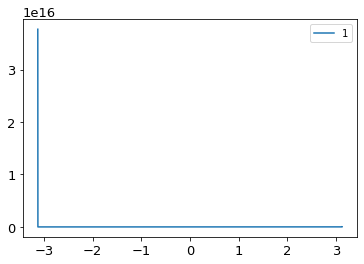

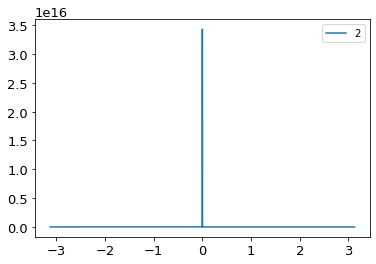

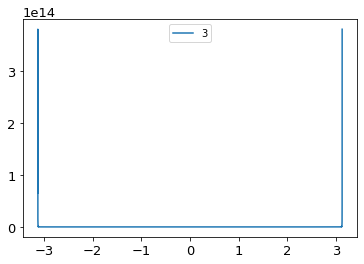

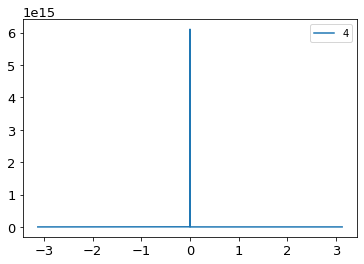

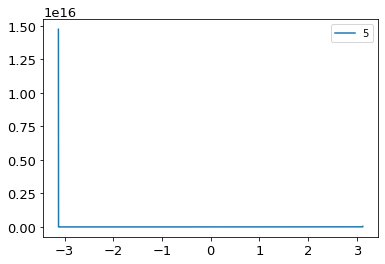

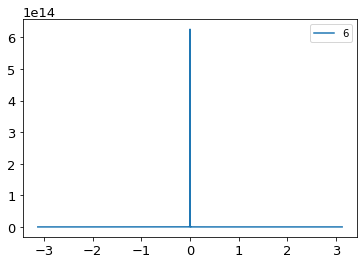

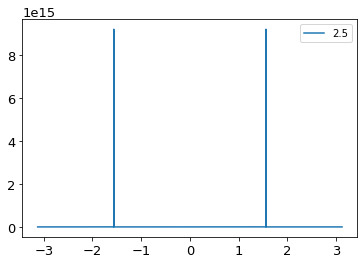

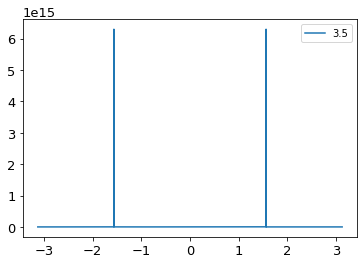

In [21]:
windows = [window_1, window_2, window_3, window_4, window_5, window_6, window_2_5, window_3_5]
labels = ['1', '2', '3', '4', '5', '6', '2.5', '3.5']

for i in range(len(windows)):
    data = windows[i]
    fft = np.fft.fft(data[0][0][:])
    shift_fft = np.fft.fftshift(fft)
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    power_fft = np.abs(shift_fft) ** 2
    plt.plot(freq, power_fft, label=labels[i])
    plt.legend()
    plt.show()

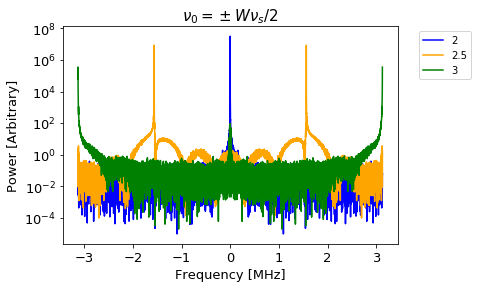

In [22]:
nyquist_window = [1, -2, 2]
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
colors = ["blue", "orange", "green"]
i = 0
for window in nyquist_window:
    data = windows[window][0][0][:]
    power_fft = calc_power_fft(data)
    plt.plot(freq, power_fft, label=labels[window], color=colors[i])
    i += 1
plt.yscale('log')
plt.ylabel("Power [Arbitrary]",fontsize=13)
plt.xlabel("Frequency [MHz]", fontsize=13)
plt.title('$\\nu_0 = \pm W \\nu_s/2$', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
# difference in magnitude due to interference in measuring the data, ideally would be the same

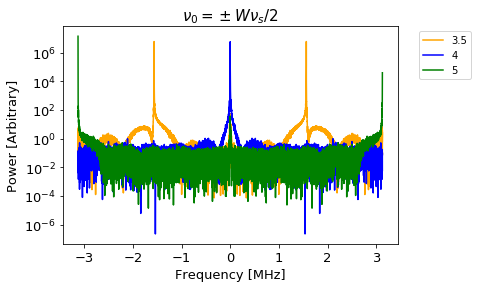

In [23]:
nyquist_window = [-1, 3, 4]
colors = ["orange", "blue", "green"]
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
i = 0
for window in nyquist_window:
    data = windows[window][0][0][:]
    power_fft = calc_power_fft(data)
    plt.plot(freq, power_fft, label=labels[window], color=colors[i])
    i += 1
plt.yscale('log')
plt.ylabel("Power [Arbitrary]",fontsize=13)
plt.xlabel("Frequency [MHz]", fontsize=13)
plt.title('$\\nu_0 = \pm W \\nu_s/2$', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Text(-0.02, 0.5, 'Power [$V^2$]')

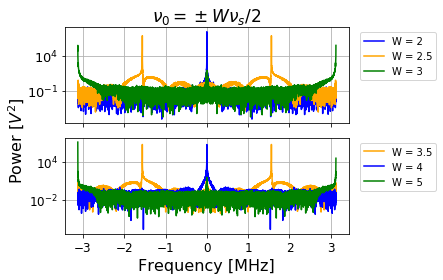

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(6,4), sharex='col')

nyquist_window = [1, -2, 2]
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
colors = ["blue", "orange", "green"]
i = 0
for window in nyquist_window:
    data = windows[window][0][0][:]
    power_fft = calc_power_fft(data)
    ax[0].plot(freq, power_fft, label='W = ' + labels[window], color=colors[i])
    i += 1
ax[0].set_yscale('log')
ax[0].legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
ax[0].set_title('$\\nu_0 = \pm W \\nu_s/2$', fontsize=17)

nyquist_window = [-1, 3, 4]
colors = ["orange", "blue", "green"]
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
i = 0
for window in nyquist_window:
    data = windows[window][0][0][:]
    power_fft = calc_power_fft(data)
    ax[1].plot(freq, power_fft, label='W = ' + labels[window], color=colors[i])
    i += 1
ax[1].set_yscale('log')
ax[1].set_xlabel("Frequency [MHz]", fontsize=16)
ax[1].legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
ax[1].grid()
ax[0].grid()
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.text(-0.02, 0.5, 'Power [$V^2$]', va='center', rotation='vertical', fontsize=16)


# Part 5.7 Fourier Transform of Noise

(1, 100, 16000)


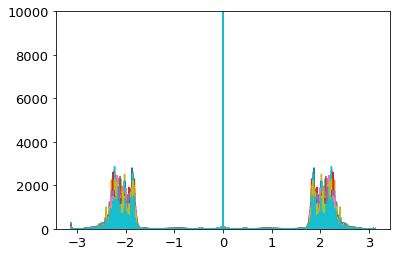

In [25]:
hundred_blocks = np.load("data/blocks_100.npy")
noise = np.load('data/final_noise_data.npy')
print(hundred_blocks.shape)
avg = np.zeros(16000)
for i in range(100):
    power_fft = calc_power_fft(noise[0][i][:])
    plt.plot(freq, power_fft, label=str(i))
    avg += power_fft
# plt.yscale('log')
# plt.legend()
plt.ylim(0,10000)
plt.show()

(0, 25)

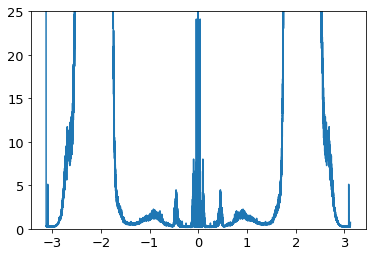

In [26]:
plt.plot(freq, avg/100)
plt.ylim(0, 25)

In [27]:
# two_blocks = hundred_blocks[0][:2]

def avg_blocks(blocks):
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
    avg = np.zeros(16000)
    num = blocks.shape[1]
    for i in range(num):
        power_fft = calc_power_fft(blocks[0][i][:])
        avg += power_fft
    avg /= num
    plt.plot(freq, avg, label='N = ' + str(num), lw=0.5)
    print(avg[len(avg)//2]/np.sum(avg), avg[len(avg)//2])
    return 
    # plt.yscale('log')
    # plt.legend()
#     plt.ylim(0,100)
        

0.06312758366019151 46405.40115356445
0.06650554649824 48765.386810302734
0.06616874300494996 48707.02011871338
0.06535773650486475 49043.066833496094
0.06644167556703727 50383.89634216308


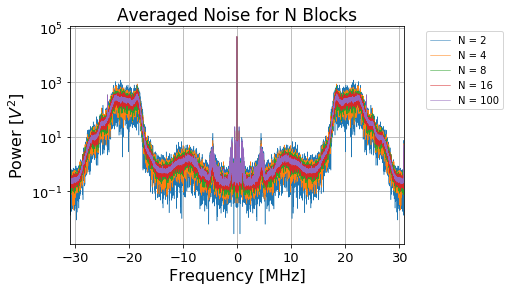

In [28]:
# avg_blocks(blocks_2)
# avg_blocks(blocks_4)
# avg_blocks(blocks_8)
# avg_blocks(blocks_16)
avg_blocks(noise[:,:2,:])
avg_blocks(noise[:,:4,:])
avg_blocks(noise[:,:8,:])
avg_blocks(noise[:,:16,:])
avg_blocks(noise)
plt.yscale('log')
# plt.ylim(0, 600)
plt.xlim(-31,31)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [$V^2$]')
plt.title('Averaged Noise for N Blocks')
plt.savefig('noise.png')
plt.show()

In [29]:
import scipy.optimize

def snr(x, n):
    return x ** n

xs = [2, 4, 8, 16, 100]
ys = [0.0341935821145206, 0.03911373792571201, 0.03984193101300074, 0.03309203622098368, 0.05625488007402137]
p0 = (20) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(snr, xs, ys, p0)
x = params
print(params)

[-4.74969436]


In [30]:
import scipy.stats
def plot_hist(blocks):
    flattened = (blocks/2**15).flatten()
    plt.hist(flattened, color='black',bins=19, density=True,label=str(blocks.shape[1]) + ' blocks')
    mean=np.mean(flattened)
    std=np.std(flattened)
    print(mean, std)
    plt.xlim(-.2, 0.2)
    xs = np.linspace(-0.6, 0.6, 1000)
    gaussian = scipy.stats.norm(mean, std).pdf(xs)
    plt.plot(xs,gaussian,'r--', label='Gaussian')

(1, 100, 16000)
0.0140199658203125 0.052589152315575566


Text(0, 0.5, 'Count')

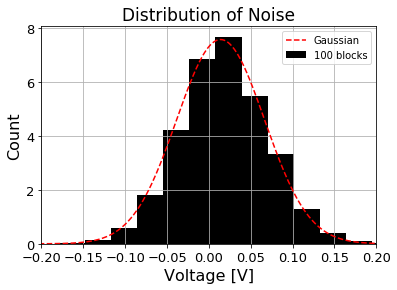

In [31]:
# block_1=data[0][:,0]
import scipy.stats
print(hundred_blocks.shape)
plot_hist(noise)
# plot_hist(noise[:,:2,:])
# plot_hist(noise[:,:4,:])
# plot_hist(noise[:,:16,:])
# print(noise[:,:2,:].shape)

plt.title('Distribution of Noise')
plt.xlabel('Voltage [V]')
plt.grid()
plt.legend()
plt.ylabel('Count')


(7000,)
(14000,)
(28000,)
(56000,)
(112000,)
(700000,)
[-1536]
[0.050846478858115766, 0.05181168793952152, 0.05148179493047414, 0.05157289040474589, 0.052374697934367, 0.052712997240950944]


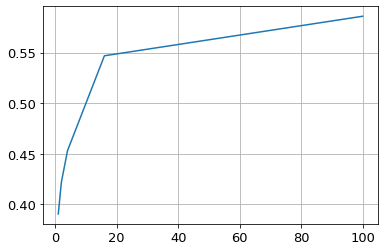

In [32]:
stds = []
means = []
diffs = []
num_blocks = np.array([1, 2, 4, 8, 16, 100])
for N in num_blocks:
    blocks = noise[:,:N,:16000//2 - 1000].flatten()/2**15
    print(blocks.shape)
    diff = np.max(blocks) - np.min(blocks)
    diffs.append(diff)
    std = np.std(blocks)
    mean = np.mean(blocks)
    stds.append(std)
    means.append(mean)
print(noise[:,0,16000//2 - 2])
print(stds)
plt.grid()
plt.plot(num_blocks, diffs)  
# plt.plot(num_blocks, .0009/np.sqrt(num_blocks*2000))


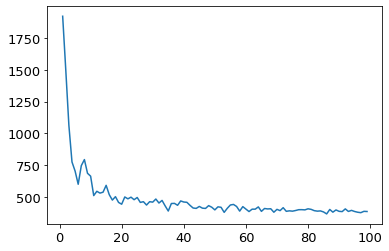

In [33]:
import random
diffs = []
num_blocks = np.arange(1, 100, 1)
for N in num_blocks:
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
    avg = np.zeros(16000)
#     num = blocks.shape[1]
    set_sample = random.sample(range(100), N)
    for i in set_sample:
        power_fft = calc_power_fft(noise[0][-i][:])
        avg += power_fft
    avg /= N
#     plt.plot(freq, avg, label='N = ' + str(num), lw=0.5)
#     print(avg[len(avg)//2]/np.sum(avg), avg[len(avg)//2])
    first_half = avg[:len(avg)//2 - 4000]
    diff = max(first_half) - min(first_half)
    diffs.append(diff)
plt.plot(num_blocks,diffs)

[ 1.60816739e+03 -3.55005233e-01]


Text(0.5, 1.0, 'Average Scatter for N Blocks')

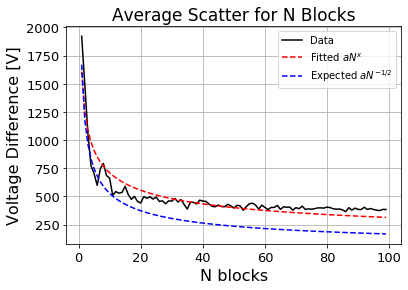

In [34]:
import scipy.optimize

def snr(x, a, n):
    return a*x**n

xs = num_blocks
ys = diffs
p0 = (-1, 1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(snr, xs, ys, p0)
x = params
print(params)
plt.grid()
plt.xlabel('N blocks')
plt.ylabel('Voltage Difference [V]')
plt.plot(num_blocks, diffs, 'k-', label='Data')
# plt.scatter(num_blocks, diffs, color='black')
# plt.plot(num_blocks, params[0]*num_blocks**(params[1]))
# plt.scatter(num_blocks, params[0]*num_blocks**(params[1]), color='r')
plt.plot(num_blocks, params[0]*num_blocks**(params[1]), 'r--', label='Fitted $aN^x$')
plt.plot(num_blocks, 1669.33187498*num_blocks**(-0.5), 'b--', label='Expected $aN^{-1/2}$')
# plt.scatter(num_blocks, 1669.33187498*num_blocks**(-0.5), color='b')
plt.legend()
plt.title('Average Scatter for N Blocks')

In [35]:
np.mean(noise.flatten()/2**15)

0.0140199658203125

[2213.22716581]


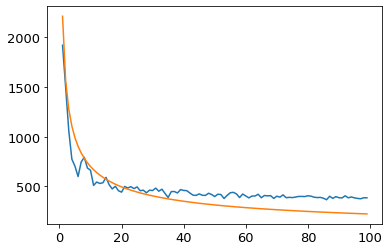

In [36]:
import scipy.optimize

def snr(x, a):
    return a*x**(-0.5)

xs = num_blocks
ys = diffs
p0 = (-1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(snr, xs, ys, p0)
x = params
print(params)
plt.plot(num_blocks, diffs)
plt.plot(num_blocks, params[0]*num_blocks**(-0.5))

2.842170943040401e-14
0.0
5.684341886080802e-14
2.842170943040401e-14
0.0
5.684341886080802e-14
5.684341886080802e-14
2.842170943040401e-14
2.842170943040401e-14
2.842170943040401e-14
5.684341886080802e-14
0.0
2.842170943040401e-14
5.684341886080802e-14
0.0
0.0
0.0
0.0
2.842170943040401e-14
2.842170943040401e-14
2.842170943040401e-14
0.0
0.0
2.842170943040401e-14
0.0
2.842170943040401e-14
0.0
5.684341886080802e-14
0.0
2.842170943040401e-14
2.842170943040401e-14
0.0
0.0
0.0
0.0
0.0
2.842170943040401e-14
0.0
2.842170943040401e-14
0.0
0.0
2.842170943040401e-14
2.842170943040401e-14
0.0
0.0
2.842170943040401e-14
5.684341886080802e-14
0.0
0.0
0.0
2.842170943040401e-14
5.684341886080802e-14
0.0
2.842170943040401e-14
0.0
2.842170943040401e-14
0.0
5.684341886080802e-14
5.684341886080802e-14
0.0
5.684341886080802e-14
2.842170943040401e-14
0.0
0.0
5.684341886080802e-14
0.0
2.842170943040401e-14
0.0
2.842170943040401e-14
0.0
5.684341886080802e-14
1.4210854715202004e-14
4.263256414560601e-14
2.842

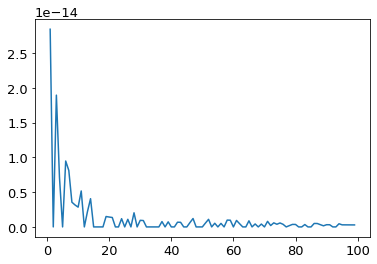

In [37]:
stds = []
for N in num_blocks:
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
    avg = np.zeros(16000)
    for i in range(N):
        power_fft = calc_power_fft(noise[0][i][:])
        avg += power_fft[0]
    avg /= N
#     plt.plot(freq, avg, label='N = ' + str(num), lw=0.5)
#     print(avg[len(avg)//2]/np.sum(avg), avg[len(avg)//2])
    std = np.std(avg)
    stds.append(std)
    print(std)
plt.plot(num_blocks, stds/num_blocks)    
# plt.plot(num_blocks, 1/np.sqrt(num_blocks*16000))

# Part 7

In [38]:
# dual_minus = np.load("data/mixed_dual_minus.npy")
# dual_minus_delay = np.load("data/mixed_dual_minus_delay.npy")
# dual_plus = np.load("data/mixed_dual_plus.npy")
# dual_plus_delay = np.load("data/mixed_dual_plus_delay.npy")
mixed_minus = np.load("data/mixed_minus.npy")
mixed_plus = np.load("data/mixed_plus.npy")
print(dual_minus.shape)
#vlo = 12 MHz, vrf = 11.4 MHz, 12.6 MHz

NameError: name 'dual_minus' is not defined

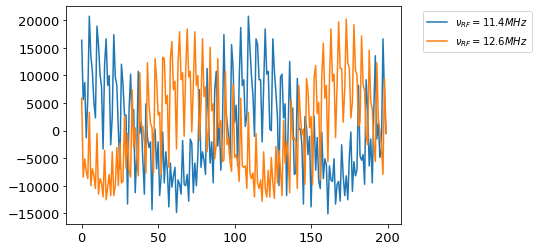

In [39]:
plt.plot(mixed_minus[0][0][:200], label="$\\nu_{RF} = 11.4 MHz$")
plt.plot(mixed_plus[0][0][:200], label="$\\nu_{RF} = 12.6 MHz$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


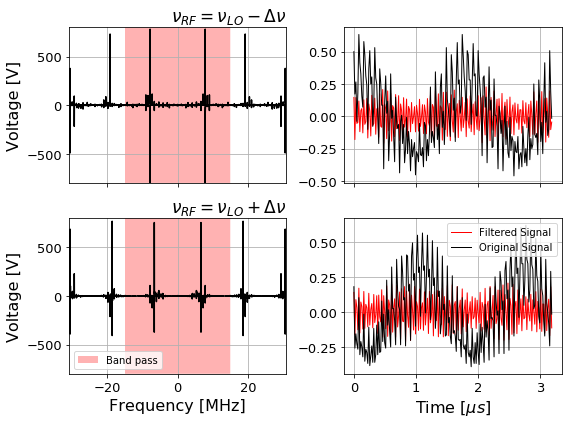

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(8,6), sharex='col')

ax = axs[0,0]
fft = np.fft.fft(mixed_minus[0][0]/2**15)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
ax.plot(freq, fft, 'k-')
ax.fill_between(freq,-800, 800,where=abs(freq) < 15,facecolor='red', alpha=0.3, label='Band pass')
ax.set_xlim(-31, 31)
ax.set_ylim(-800, 800)
fft.real[0:4000] = 0
fft.real[12000:] = 0
fft.imag[0:4000] = 0
fft.imag[12000:] = 0
ifft = np.fft.ifft(fft)
ax.grid()
# ax.legend()
# ax.set_xlabel("Frequency [MHz]")
ax.set_ylabel("Voltage [V]")
ax.set_title('$\\nu_{RF} = \\nu_{LO} - \Delta\\nu$', loc='right')

ax = axs[1,0]
fft = np.fft.fft(mixed_plus[0][0]/2**15)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
ax.plot(freq, fft, 'k-')
ax.fill_between(freq,-800, 800,where=abs(freq) < 15,facecolor='red', alpha=0.3, label='Band pass')
ax.set_xlim(-31, 31)
ax.set_ylim(-800, 800)
fft.real[0:4000] = 0
fft.real[12000:] = 0
fft.imag[0:4000] = 0
fft.imag[12000:] = 0
ifft2 = np.fft.ifft(fft)
ax.grid()
ax.legend()
ax.set_xlabel("Frequency [MHz]")
ax.set_ylabel("Voltage [V]")
ax.set_title('$\\nu_{RF} = \\nu_{LO} + \Delta\\nu$', loc='right')

ax = axs[0,1]
total_time = 1/62.5
time = np.arange(0, 16000) * total_time
ax.plot(time[:200], ifft[:200], 'r-',label ="Filtered Signal", lw=1)
ax.plot(time[:200], mixed_minus[0][0][:200]/2**15,'k-', label="Original Signal", lw=1)
# ax.legend()
ax.grid()
# ax.set_xlabel("Time [$\mu s$]")
# ax.set_ylabel('Voltage [V]')

ax = axs[1, 1]
total_time = 1/62.5
time = np.arange(0, 16000) * total_time
ax.plot(time[:200], ifft2[:200], 'r-',label ="Filtered Signal", lw=1)
ax.plot(time[:200], mixed_plus[0][0][:200]/2**15,'k-', label="Original Signal", lw=1)
ax.legend()
ax.grid()
ax.set_xlabel("Time [$\mu s$]")
# ax.set_ylabel('Voltage [V]')
plt.tight_layout()
# plt.legend()

# .savefig("prefilter.png")

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Voltage [V]')

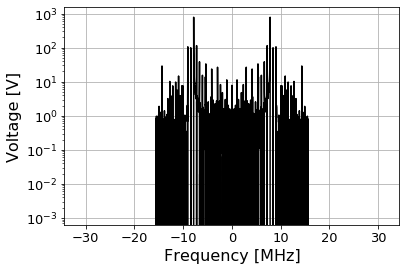

In [41]:
fft = np.fft.fft(mixed_minus[0][0]/2**15)
# plt.plot(fft)
fft[0:4000] = 0
fft[12000:] = 0
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
plt.plot(freq, fft, 'k-')
ifft = np.fft.ifft(fft)
plt.yscale('log')
plt.grid()
plt.xlabel("Frequency [MHz]")
plt.ylabel("Voltage [V]")

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


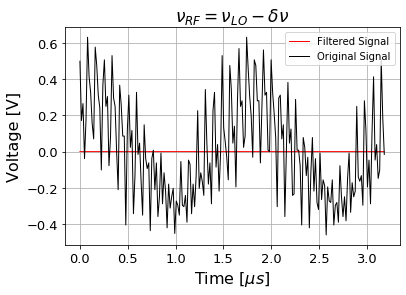

In [42]:
total_time = 1/62.5
time = np.arange(0, 16000) * total_time
plt.plot(time[:200], ifft[:200]/2**15, 'r-',label ="Filtered Signal", lw=1)
plt.plot(time[:200], mixed_minus[0][0][:200]/2**15,'k-', label="Original Signal", lw=1)
plt.legend()
plt.grid()
plt.xlabel("Time [$\mu s$]")
plt.ylabel('Voltage [V]')
plt.title("$\\nu_{RF} = \\nu_{LO} - \delta\\nu$")
plt.savefig('filtered.png')

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


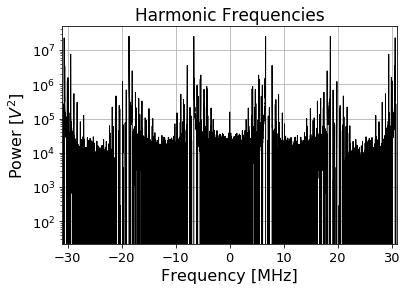

In [43]:
fft = np.fft.fft(mixed_plus[0][0])
plt.plot(freq, fft, 'k-', lw=1)
plt.yscale('log')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [$V^2$]')
plt.xlim(-31, 31)
plt.grid()
plt.title('Harmonic Frequencies')
plt.savefig("forest.png")

In [44]:
no_shift_minus = np.load("data/no_shift_minus.npy") #0 degree shift -5%
no_shift_plus = np.load("data/no_shift_plus.npy") #0 degree shift +5%
phase_shift_plus = np.load("data/phase_shift_plus.npy") #90 degree shift +5%
phase_shift_minus = np.load("data/phase_shift_minus.npy")

#vlo = 30MHz vrf = 31.5 28.5

In [45]:
# need to do C = A + 1j * B before doing power spectra for A and B ports
# remove both sum and diff and the frequency itself (4 peaks)
# should be on one side of spectra
print(phase_shift_plus.shape)

(2, 1, 16000)


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


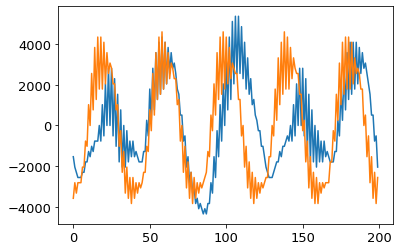

In [46]:
A = phase_shift_plus[0][0]
B = phase_shift_plus[1][0]
C = A + 1j * B
no_shift = no_shift_plus[0][0]
plt.plot(C[:200])
plt.plot(no_shift[:200])

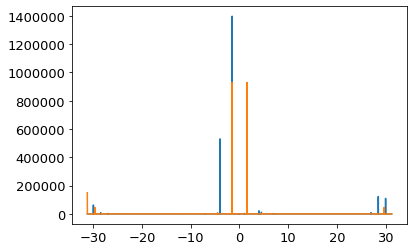

In [51]:
A = phase_shift_plus[0][0]
B = phase_shift_plus[1][0]
C = A + 1j * B
no_shift = no_shift_plus[0][0]
plt.plot(C[:200])
plt.plot(no_shift[:200])
power_fft = calc_power_fft(C) # plotting no shift + and shift + 
power_fft_no_shift = calc_power_fft(no_shift)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
plt.plot(freq, power_fft) # with 90 phase shift
plt.plot(freq, power_fft_no_shift)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


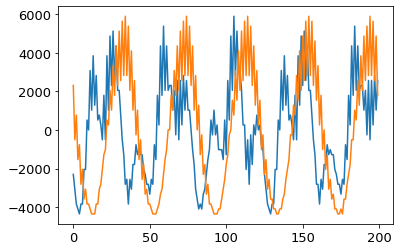

In [48]:
A = phase_shift_minus[0][0]
B = phase_shift_minus[1][0]
C = A + 1j * B
no_shift = no_shift_minus[0][0]
plt.plot(C[:200])
plt.plot(no_shift[:200])

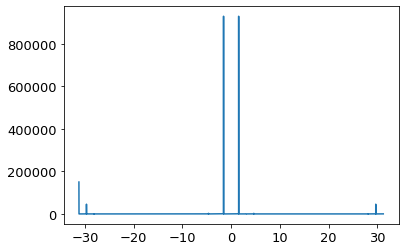

In [50]:
power_fft = calc_power_fft(C) # plotting no shift + and shift + 
power_fft_no_shift = calc_power_fft(no_shift)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
# plt.plot(freq, power_fft)
plt.plot(freq, power_fft_no_shift)

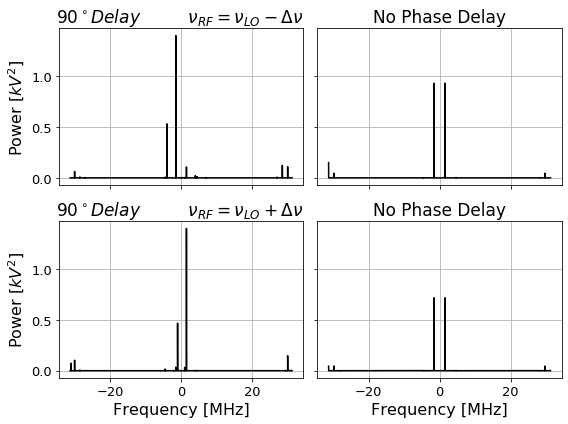

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(8,6), sharex='col', sharey='row')
ax = axs[0,0]
A = phase_shift_minus[0][0]
B = phase_shift_minus[1][0]
C = A + 1j * B
no_shift = no_shift_minus[0][0]
# plt.plot(C[:200])
# plt.plot(no_shift[:200])
power_fft = calc_power_fft(C) # plotting no shift + and shift + 
power_fft_no_shift = calc_power_fft(no_shift)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
ax.plot(freq, power_fft/1e6, 'black') # with 90 phase shift
ax.set_title('$90^\circ Delay$         $\\nu_{RF} = \\nu_{LO} - \Delta\\nu$', loc='right')
ax.grid()
ax.set_ylabel('Power [$kV^2$]')
# ax.set_xlabel('Frequency [MHz]')
axs[0,1].plot(freq, power_fft_no_shift/1e6, 'black')
axs[0,1].grid()
# axs[,1].set_xlabel('Frequency [MHz]')


ax = axs[1,0]
A = phase_shift_plus[0][0]
B = phase_shift_plus[1][0]
C = A + 1j * B
no_shift = no_shift_plus[0][0]
# plt.plot(C[:200])
# plt.plot(no_shift[:200])
power_fft = calc_power_fft(C) # plotting no shift + and shift + 
power_fft_no_shift = calc_power_fft(no_shift)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/62.5))
ax.plot(freq, power_fft/1e6, 'black') # with 90 phase shift
ax.set_title('$90^\circ Delay$         $\\nu_{RF} = \\nu_{LO} + \Delta\\nu$', loc='right')
ax.grid()
ax.set_ylabel('Power [$kV^2$]')
ax.set_xlabel('Frequency [MHz]')
axs[1,1].plot(freq, power_fft_no_shift/1e6, 'black')
axs[1,1].grid()
axs[1,1].set_title('No Phase Delay')
axs[0,1].set_title('No Phase Delay')
axs[1,1].set_xlabel('Frequency [MHz]')



plt.tight_layout()